In [34]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [35]:
# read in data
df = pd.read_csv("googleplaystore.csv")

# check out the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
# check out a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Thoughts on the summary
There's some nulls in rating, type, content rating, current ver, and android ver.
<br>
A few columns need to be cast to their appropriate data types (price is currently string and should be a float)

In [37]:
# clean the data
# we'll start by dropping the nulls
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


#### The nulls have been handled

#### Clean up the reviews, size, install, and price

In [38]:
# explore size for a second
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [39]:
# need to convert from string to float/int
# also need to handle the M and k
# gonna drop the k and convert to M, then cast to float
# simply gonna drop the M, then cast to float
# also going to drop the row that has 'varies with device'; that's junk to me

# drop the junk rows
df = df[df.Size != 'Varies with device']
df = df[df.Size != '1,000+']


# check my work
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M', '56M',
       '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M', '27M',
       '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [40]:
# booyah

# handle the 'k' rows
k_bool = df['Size'].str.contains('k')

#df.loc[df['Size'], 'size'] = df[k_bool['Size']].replace('k','').replace(' ','').astype(float) / 1000
#k_df = pd.DataFrame()
#df.loc[df['Size'], 'size'] = df[]

# partition data between M and k
k_df = df[k_bool]
m_df = df[~k_bool]

k_df['size'] = k_df['Size'].str.replace('k','').replace(' ','').astype(float) / 1000
m_df['size'] = m_df['Size'].str.replace('M','').replace(' ','').astype(float)

# drop all but one col
k_df = k_df[['size']]
m_df = m_df[['size']]
merged = k_df.append(m_df)

# cleaned-ish data
df['size'] = merged['size']
df = df.dropna()
df

/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.700
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.800
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.600
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.000
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29.000
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33.000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.100


In [41]:
# clean the rest of the junky columns
df['Rating'] = df['Rating'].astype(int)
df['Reviews'] = df['Reviews'].astype(int)
df['Price'] = df['Price'].str.replace('$','').astype(float)
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','').astype(int)

# need to replace the commas with underscores; it throws off adding it to postgres
df['App'] = df['App'].str.replace(',','_')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.000
1,Coloring book moana,ART_AND_DESIGN,3,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.000
2,U Launcher Lite – FREE Live Cool Themes_ Hide ...,ART_AND_DESIGN,4,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.700
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.800
5,Paper flowers instructions,ART_AND_DESIGN,4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.600
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.000
7,Infinite Painter,ART_AND_DESIGN,4,36815,29M,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29.000
8,Garden Coloring Book,ART_AND_DESIGN,4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33.000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.100


In [42]:
# drop columns I don't care about
df = df[['App', 'Category', 'Rating', 'Reviews', 'size', 'Installs', 'Price', 'Content Rating', 'Genres']]

# clean up columns names
df.columns = ['app_name', 'category', 'rating', 'reviews', 'size', 'installs', 'price', 'content_rating', 'genre']

In [43]:
# reset the index
df = df.reset_index(drop=True)

# take a look at the summary again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 9 columns):
app_name          7723 non-null object
category          7723 non-null object
rating            7723 non-null int64
reviews           7723 non-null int64
size              7723 non-null float64
installs          7723 non-null int64
price             7723 non-null float64
content_rating    7723 non-null object
genre             7723 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 543.1+ KB


#### Our data is clean, now we can store it in postgres

Let's go ahead and connect so that we can create a table to store it in

In [44]:
# establish connection to the pg database
conn = psycopg2.connect(dbname = "can",
                       user = "python",
                       password = "pythonuser",
                       host = "pyrva.cul6zd3pcwrp.us-east-2.rds.amazonaws.com")

cur = conn.cursor()

# this statement is used to delete a table before creating it in order to assure no collusions
# be sure to always replace your name

cur.execute("DROP TABLE IF EXISTS [your_last_name]_test")
q = '''
    CREATE TABLE [your_last_name]_test(
        id INTEGER PRIMARY KEY,
        app_name TEXT,
        category TEXT,
        rating int,
        reviews int,
        size float,
        installs int,
        price float,
        content_rating TEXT,
        genre TEXT
    )
'''

cur.execute(q)
conn.commit()
cur.execute('SELECT * FROM [your_last_name]_test')

In [45]:
# load the datum into postgres

df.to_csv('sample_file.csv')
df.head()
with open('sample_file.csv', 'r') as f:
    # Skip the header row.
    next(f)
    cur.copy_from(f, '[your_last_name]_test', sep=',')
conn.commit()

In [46]:
conn.close()

#### Congratulations, our data is in postgres
Let's run some queries and play around with the data

In [47]:
# establish connection to the pg database
conn = psycopg2.connect(dbname = "can",
                       user = "python",
                       password = "pythonuser",
                       host = "pyrva.cul6zd3pcwrp.us-east-2.rds.amazonaws.com")

# most expensive apps
q = '''
    SELECT app_name, price
    FROM [your_last_name]_test
    ORDER BY price desc
    LIMIT 10
'''

result = pd.read_sql(q, conn)
result

,app_name,price
0,I'm Rich - Trump Edition,400.00
1,I am rich(premium),399.99
2,I Am Rich Premium,399.99
3,I am Rich!,399.99
4,I Am Rich Pro,399.99
5,I am rich,399.99
6,I am Rich Plus,399.99
7,💎 I'm rich,399.99
8,most expensive app (H),399.99
9,I am rich (Most expensive app),399.99


In [48]:
# most installed apps
q = '''
    SELECT *
    FROM [your_last_name]_test
    ORDER BY installs desc
    LIMIT 20
'''

result = pd.read_sql(q, conn)
result

,id,app_name,category,rating,reviews,size,installs,price,content_rating,genre
0,1348,Subway Surfers,GAME,4,27725352,76.0,1000000000,0.0,Everyone 10+,Arcade
1,1213,Subway Surfers,GAME,4,27724094,76.0,1000000000,0.0,Everyone 10+,Arcade
2,7052,Google News,NEWS_AND_MAGAZINES,3,878065,13.0,1000000000,0.0,Teen,News & Magazines
3,2599,Google News,NEWS_AND_MAGAZINES,3,877635,13.0,1000000000,0.0,Teen,News & Magazines
4,1137,Subway Surfers,GAME,4,27722264,76.0,1000000000,0.0,Everyone 10+,Arcade
5,1316,Subway Surfers,GAME,4,27725352,76.0,1000000000,0.0,Everyone 10+,Arcade
6,2578,Google News,NEWS_AND_MAGAZINES,3,877635,13.0,1000000000,0.0,Teen,News & Magazines
7,2677,Subway Surfers,GAME,4,27711703,76.0,1000000000,0.0,Everyone 10+,Arcade
8,1173,Subway Surfers,GAME,4,27723193,76.0,1000000000,0.0,Everyone 10+,Arcade
9,2625,Google News,NEWS_AND_MAGAZINES,3,877643,13.0,1000000000,0.0,Teen,News & Magazines


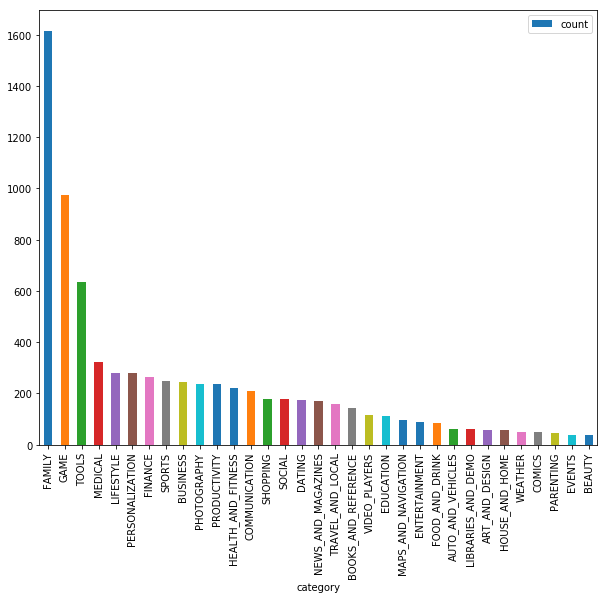

In [49]:
# let's plot some stuff

# most popular category
q = '''
    SELECT category, COUNT(category)
    FROM [your_last_name]_test
    GROUP BY category
    ORDER BY 2 DESC
'''


result = pd.read_sql(q, conn)
result.plot(x='category',y='count', kind='bar', figsize = (10,8))

# ..this took me so long

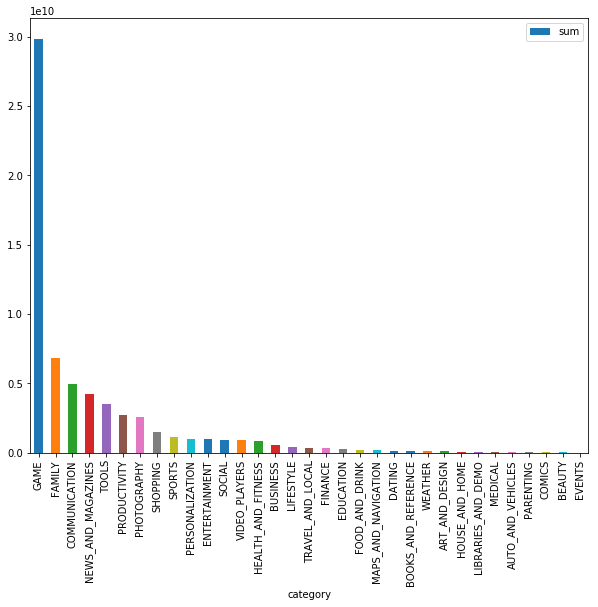

In [50]:
q = '''
    SELECT category, sum(installs)
    FROM [your_last_name]_test
    GROUP BY category
    ORDER BY 2 desc
'''


result = pd.read_sql(q, conn)
result.plot(x='category',y='sum', kind='bar', figsize = (10,8))

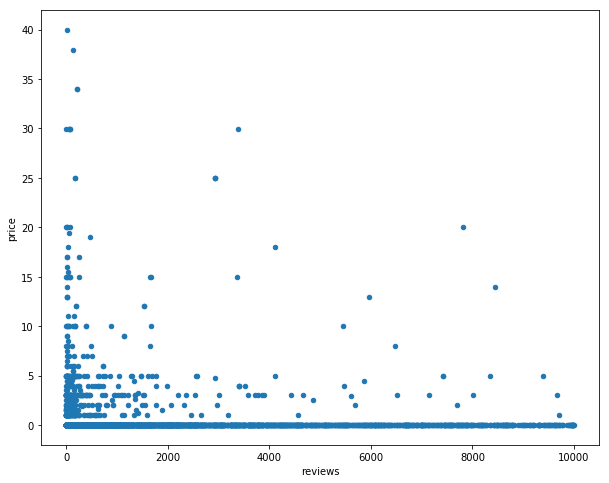

In [51]:
# compare reviews with installs
q = '''
    SELECT reviews, price
    FROM [your_last_name]_test
    WHERE price < 50 AND reviews < 10000
'''


result = pd.read_sql(q, conn)
result.plot(x='reviews',y='price', kind='scatter', figsize = (10,8))

In [52]:
conn.close()